## Imported Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/creditcard.csv')

dataset.describe()
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## The classes are heavily skewed we need to solve this issue later.

No Frauds 99.75 % of the dataset
Frauds 0.25 % of the dataset


<ipython-input-7-29522e2c954a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class',data=dataset, palette=colors)
<ipython-input-7-29522e2c954a>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
<ipython-input-7-29522e2c954a>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functi

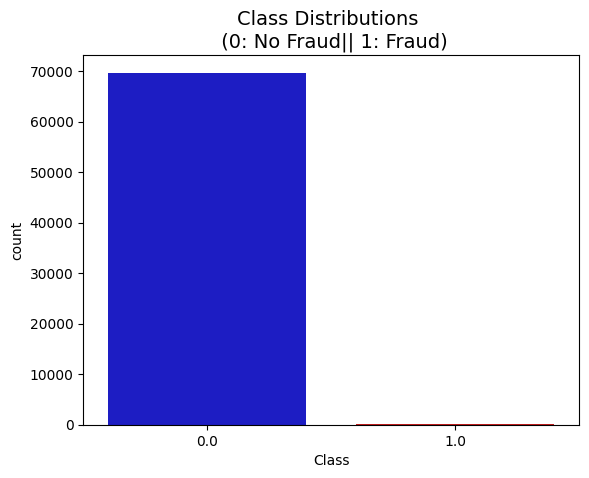

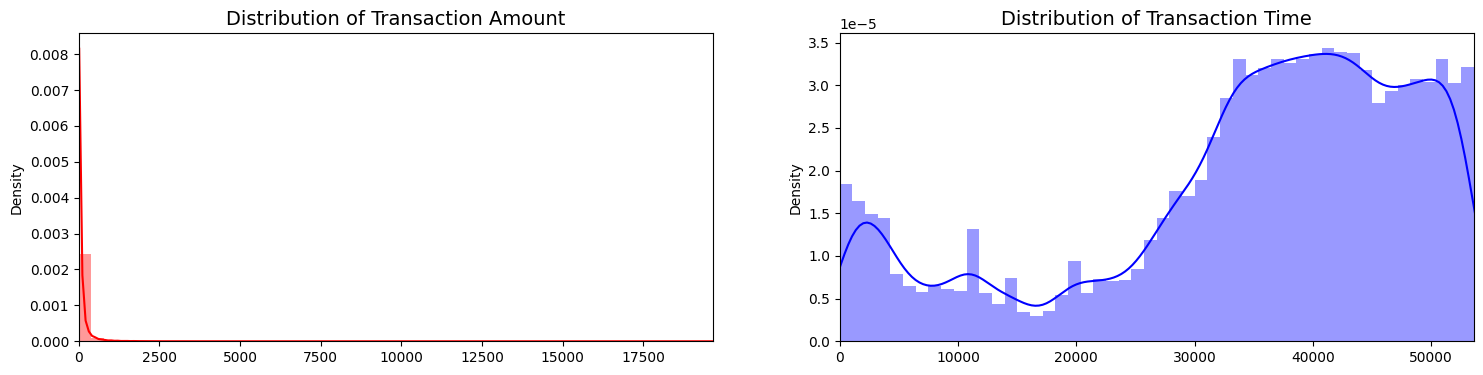

In [7]:
print('No Frauds', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Frauds', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

'''Notice how imbalanced is our original dataset! Most of the transactions are non-fraud.
 If we use this dataframe as the base for our predictive models and analysis
 we might get a lot of errors and our algorithms will probably overfit since it will "assume" that
 most transactions are not fraud. But we don't want our model to assume,
 we want our model to detect patterns that give signs of fraud!'''

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class',data=dataset, palette=colors)
plt.title('Class Distributions \n (0: No Fraud|| 1: Fraud)', fontsize=14)


#Distributions: By seeing the distributions we can have an idea how skewed are these features
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = dataset['Amount'].values
time_val = dataset['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

## Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# RobustScaler is less prone to outliers.
#std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataset['scaled_amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = dataset['scaled_amount']
scaled_time = dataset['scaled_time']

dataset.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
dataset.insert(0, 'scaled_amount', scaled_amount)
dataset.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.518688,-2.270474,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.293697,-2.270474,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,4.343900,-2.270414,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.196497,-2.270414,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.536450,-2.270354,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [10]:
print('No Frauds', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Frauds', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

# 1. Drop rows with NaN values in the 'Class' column:
dataset.dropna(subset=['Class'], inplace=True)

# 2. Impute the missing values with a strategy like mean, median, or mode:
# For example, if 'Class' is a categorical feature, you can use mode:
# dataset['Class'].fillna(dataset['Class'].mode()[0], inplace=True)

# 3. If appropriate for your data, replace NaN with a specific value:
# dataset['Class'].fillna(-1, inplace=True) # Replace NaN with -1

# After handling the missing values, proceed with your code:
X = dataset.drop('Class', axis=1)
y = dataset[['Class']]

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

No Frauds 99.75 % of the dataset
Frauds 0.25 % of the dataset
Train: [ 9413 43616 42670 ... 67503 52017 52314] Test: [49453 10923 59948 ... 57357 45729 60851]
Train: [62842 17298 52234 ... 67120 57150 34133] Test: [23136 10990 15784 ... 69752 14108 32763]
Train: [43413 67673 15420 ... 62454 54159 32512] Test: [ 5082 57774 16068 ... 12106 19544 26610]
Train: [14964 56431 17001 ... 35883 42637 38309] Test: [55068 10984 47406 ... 11437  5028 38208]
Train: [12476 51490 56829 ... 48730 44377 25852] Test: [43955 65086 63440 ... 26690 21024  2602]


In [11]:
# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99751262 0.00248738]
[0.99749481 0.00250519]


## Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

## Lets shuffle the data before creating the subsamples

In [12]:
dataset = dataset.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = dataset.loc[dataset['Class'] == 1]
non_fraud_df = dataset.loc[dataset['Class'] == 0][:497]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()
new_df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,...,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,0.770328,-0.286837,-1.825794,1.359135,-1.881685,1.613522,-1.561080,-0.475903,-1.954090,0.889396,...,0.158545,0.158352,-0.093078,-0.080295,-0.001457,0.163109,0.039379,0.134921,0.023258,0.259314
std,2.225378,0.888312,5.262533,3.225864,6.270346,2.905471,3.919923,1.626067,4.765249,3.530744,...,0.714326,1.021160,0.657095,0.907825,0.552312,0.605458,0.485055,0.709439,0.336470,0.438585
min,-0.326878,-2.268317,-30.552380,-5.198360,-31.103685,-3.921990,-22.105532,-4.977692,-21.922811,-34.535000,...,-3.042626,-14.004410,-2.288686,-19.254328,-1.751966,-4.781606,-1.212590,-3.908080,-1.869290,0.000000
25%,-0.301653,-0.764706,-1.717317,-0.288885,-1.176659,-0.083137,-1.411580,-1.055121,-1.227043,-0.109560,...,-0.163466,-0.191200,-0.543665,-0.213953,-0.314589,-0.136323,-0.296590,-0.051686,-0.004989,0.000000
50%,-0.018503,-0.051362,-0.513973,0.412829,0.412392,0.870711,-0.503225,-0.438241,-0.213470,0.154612,...,-0.008202,0.001294,-0.056099,-0.050619,0.073727,0.157944,-0.060696,0.023363,0.028262,0.000000
75%,0.875170,0.369363,1.101502,1.522641,1.125446,2.472528,0.143089,0.289335,0.326074,0.575367,...,0.300051,0.338295,0.345387,0.105013,0.383495,0.456254,0.327436,0.217039,0.122393,1.000000
max,21.995559,0.936142,1.628532,16.713389,3.862590,11.927512,5.269255,7.518234,5.431271,20.007208,...,7.251308,3.147428,3.570040,3.146670,1.159136,2.208209,2.952093,3.052358,1.130625,1.000000


Distribution of the Classes in the subsample dataset
Class
0.0    0.740686
1.0    0.259314
Name: count, dtype: float64


<ipython-input-14-85b74bab73ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=new_df, palette=colors)


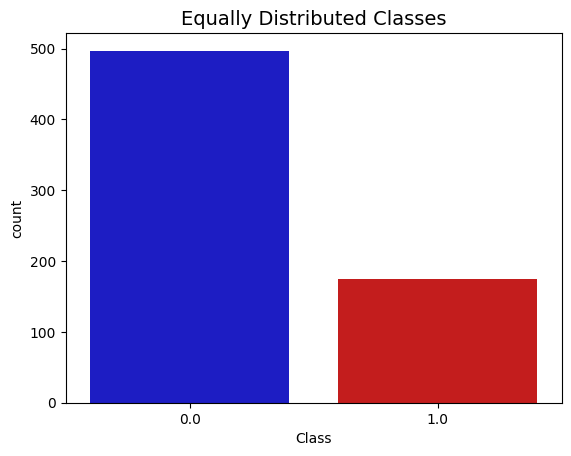

In [14]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

# Specify 'x' as a keyword argument
sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

T-SNE took 7.0 s
PCA took 0.031 s
Truncated SVD took 0.006 s


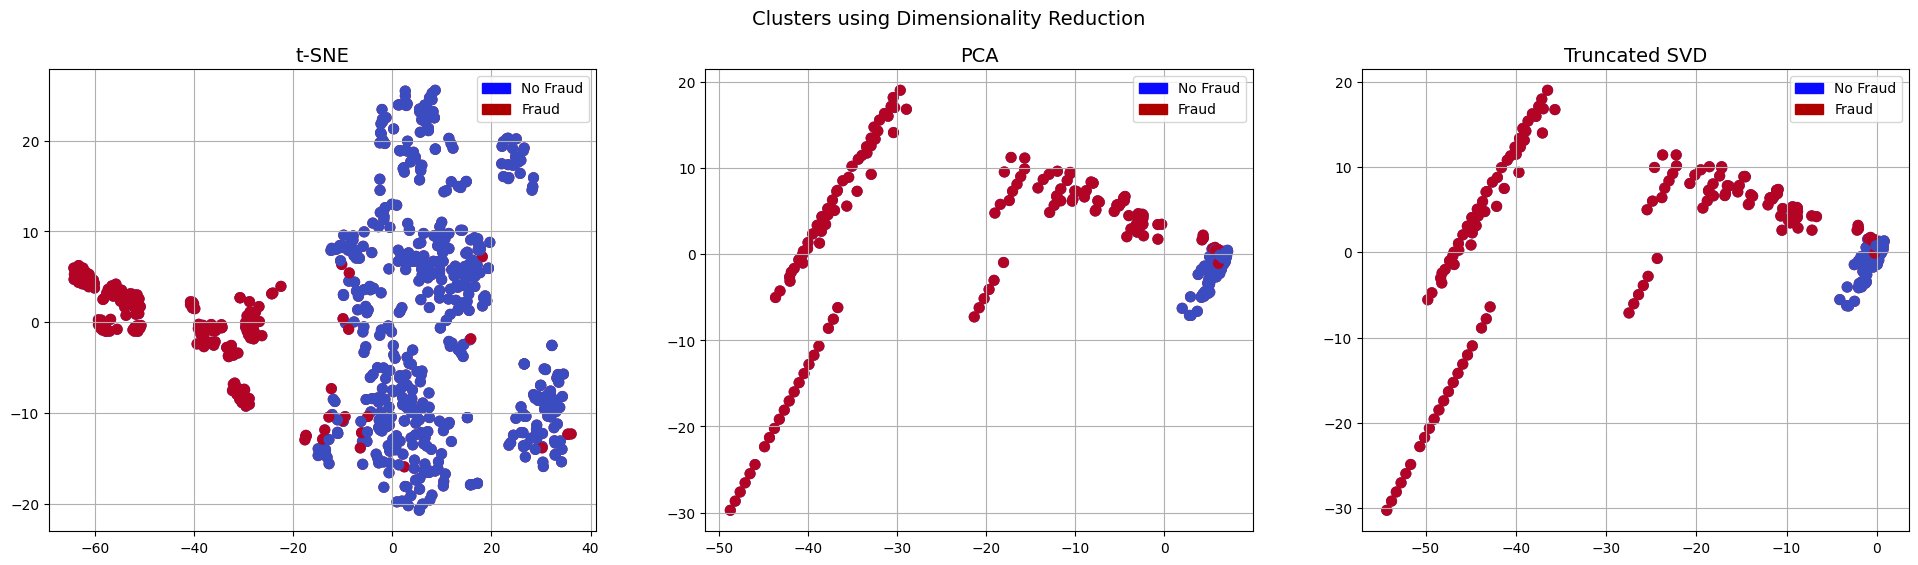

In [15]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plots
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## Undersampling before cross validating (prone to overfit)

In [16]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [17]:
def plot_learning_curve(estimator1, X, y,name, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1) = plt.subplots(1,1, figsize=(10,7), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title(str(name)+" Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    return plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

## Let's implement simple classifiers

Classifiers:  RandomForestClassifier
[[105   0]
 [  6  24]]


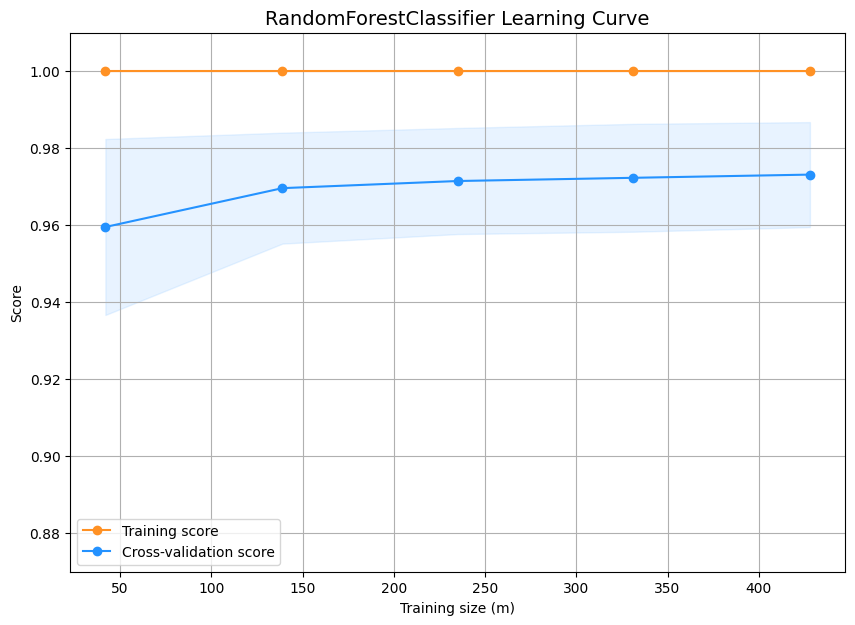

tn, fp, fn, tp
0.7777777777777778 0.0 0.044444444444444446 0.17777777777777778
specificity: 1.0
sensitivity: 0.8
RandomForestClassifier
accuracy_score: 0.9555555555555556
precision_score: 1.0
f1_score: 0.8888888888888888
Classifiers:  LogisticRegression
[[104   1]
 [  5  25]]


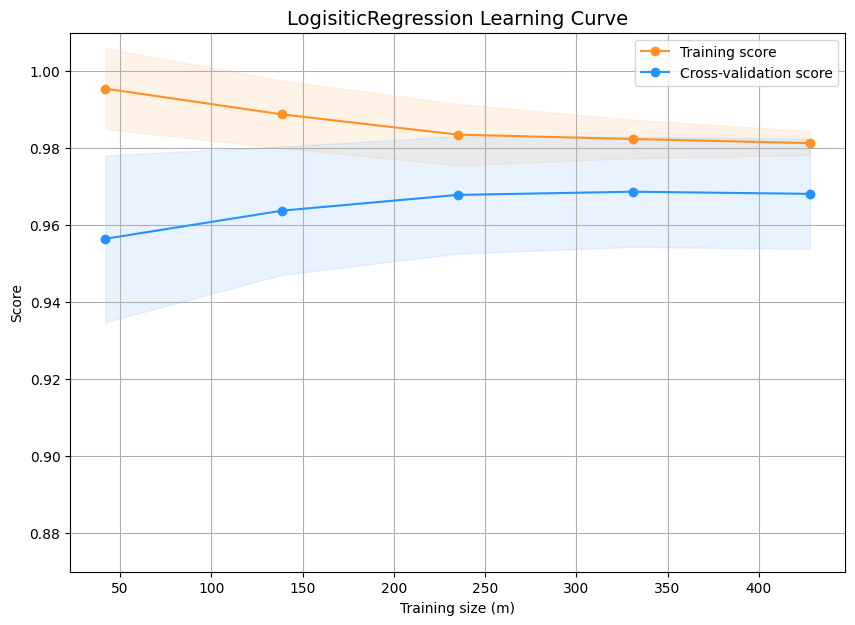

tn, fp, fn, tp
0.7703703703703704 0.007407407407407408 0.037037037037037035 0.18518518518518517
specificity: 0.9904761904761905
sensitivity: 0.8333333333333334
LogisiticRegression
accuracy_score: 0.9555555555555556
precision_score: 0.9615384615384616
f1_score: 0.8928571428571429
Classifiers:  KNeighborsClassifier
[[104   1]
 [  5  25]]


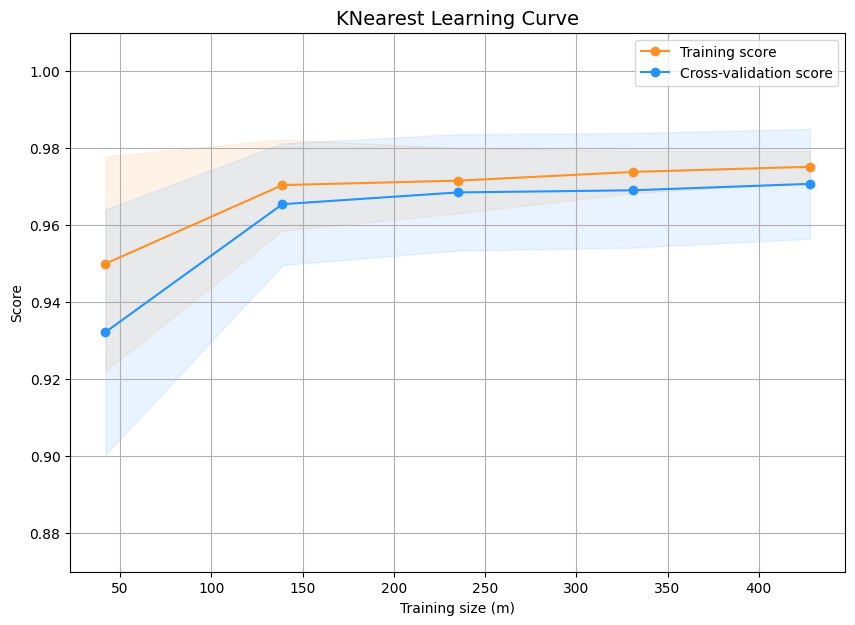

tn, fp, fn, tp
0.7703703703703704 0.007407407407407408 0.037037037037037035 0.18518518518518517
specificity: 0.9904761904761905
sensitivity: 0.8333333333333334
KNearest
accuracy_score: 0.9555555555555556
precision_score: 0.9615384615384616
f1_score: 0.8928571428571429
Classifiers:  SVC
[[105   0]
 [  6  24]]


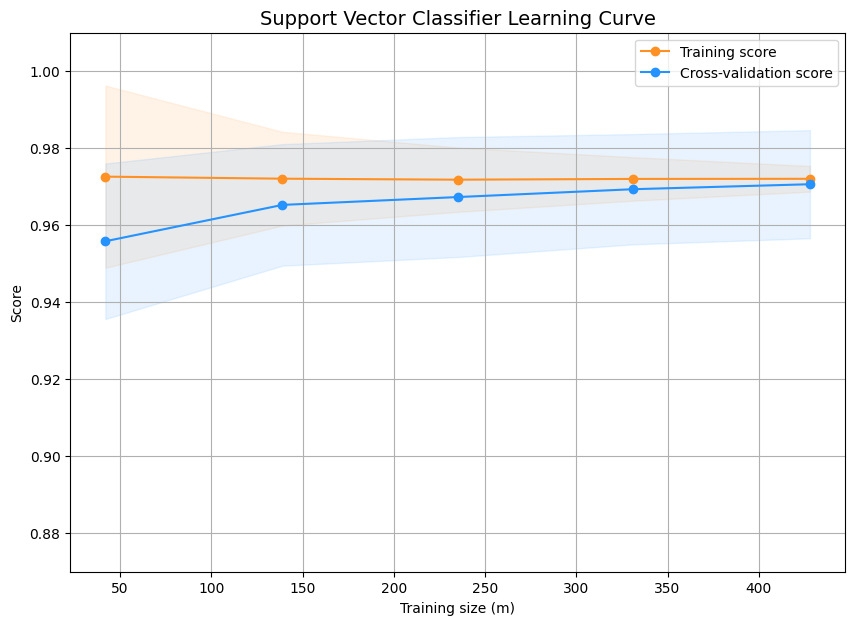

tn, fp, fn, tp
0.7777777777777778 0.0 0.044444444444444446 0.17777777777777778
specificity: 1.0
sensitivity: 0.8
Support Vector Classifier
accuracy_score: 0.9555555555555556
precision_score: 1.0
f1_score: 0.8888888888888888
Classifiers:  DecisionTreeClassifier
[[101   4]
 [  6  24]]


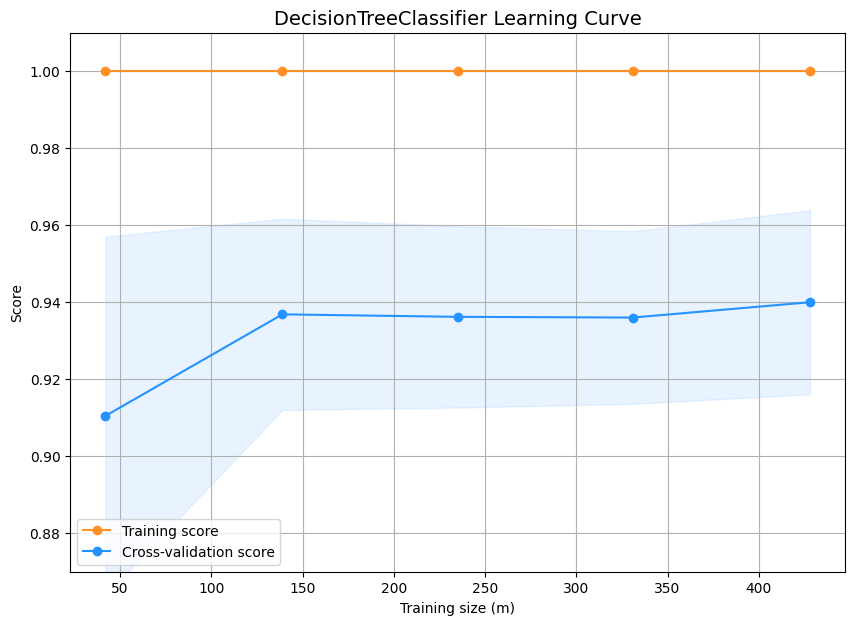

tn, fp, fn, tp
0.7481481481481481 0.02962962962962963 0.044444444444444446 0.17777777777777778
specificity: 0.9619047619047619
sensitivity: 0.8
DecisionTreeClassifier
accuracy_score: 0.9259259259259259
precision_score: 0.8571428571428571
f1_score: 0.8275862068965517


In [18]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
#import collections

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300),
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
#     "XGBClassifier":XGBClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    #metrics
    print("Classifiers: ", classifier.__class__.__name__)
    cm=confusion_matrix(y_test, y_pred)
    print(cm)

    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
    x=plot_learning_curve(classifier, X_train, y_train,key, (0.87, 1.01), cv=cv, n_jobs=4)
    x.show()
    f1=f1_score(y_test, y_pred)
    acc=accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    pr=precision_score(y_test, y_pred)
    print("tn, fp, fn, tp")
    t=tp+tn+fn+fp
    print(tn/t, fp/t, fn/t, tp/t)
    print("specificity: "+str(tn/(tn+fp)))
    print("sensitivity: "+str(tp/(tp+fn)))
    print(key)
    print("accuracy_score:",acc)
    print("precision_score:",pr)
    print("f1_score:",f1)